# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| export

import os, uuid
from string import Template
from playwright.async_api import async_playwright

In [ ]:
#| hide

from nbdev.showdoc import *

In [ ]:
#| export
async def generate_screenshot(code, code_file = "./playground.html", screenshots_dir = "./screenshots"):
  if not os.path.exists(screenshots_dir): os.makedirs(screenshots_dir)
  screenshot_file = os.path.join(screenshots_dir, f"{uuid.uuid4()}.png")

  # html escape code
  cc = code.replace("&", "&amp;").replace("<", "&lt;").replace(">", "&gt;")
  # remove trailing whitespaces and line breaks
  cc = cc.strip()

  with open(code_file, 'r') as file: playground = Template(file.read()).substitute(code=cc)

  async with async_playwright() as playwright:
    # webkit = playwright.webkit
    chromium = playwright.chromium
    browser = await chromium.launch()
    browser_context = await browser.new_context(device_scale_factor=2)
    page = await browser_context.new_page()
    await page.set_content(playground)
    await page.locator("#code").screenshot(path=screenshot_file)
    await browser.close()

  return screenshot_file

In [ ]:
from IPython.display import Image

async def demo(code):
  img = await generate_screenshot(code=code)
  return Image(filename=img)
    

# Fairly short python example

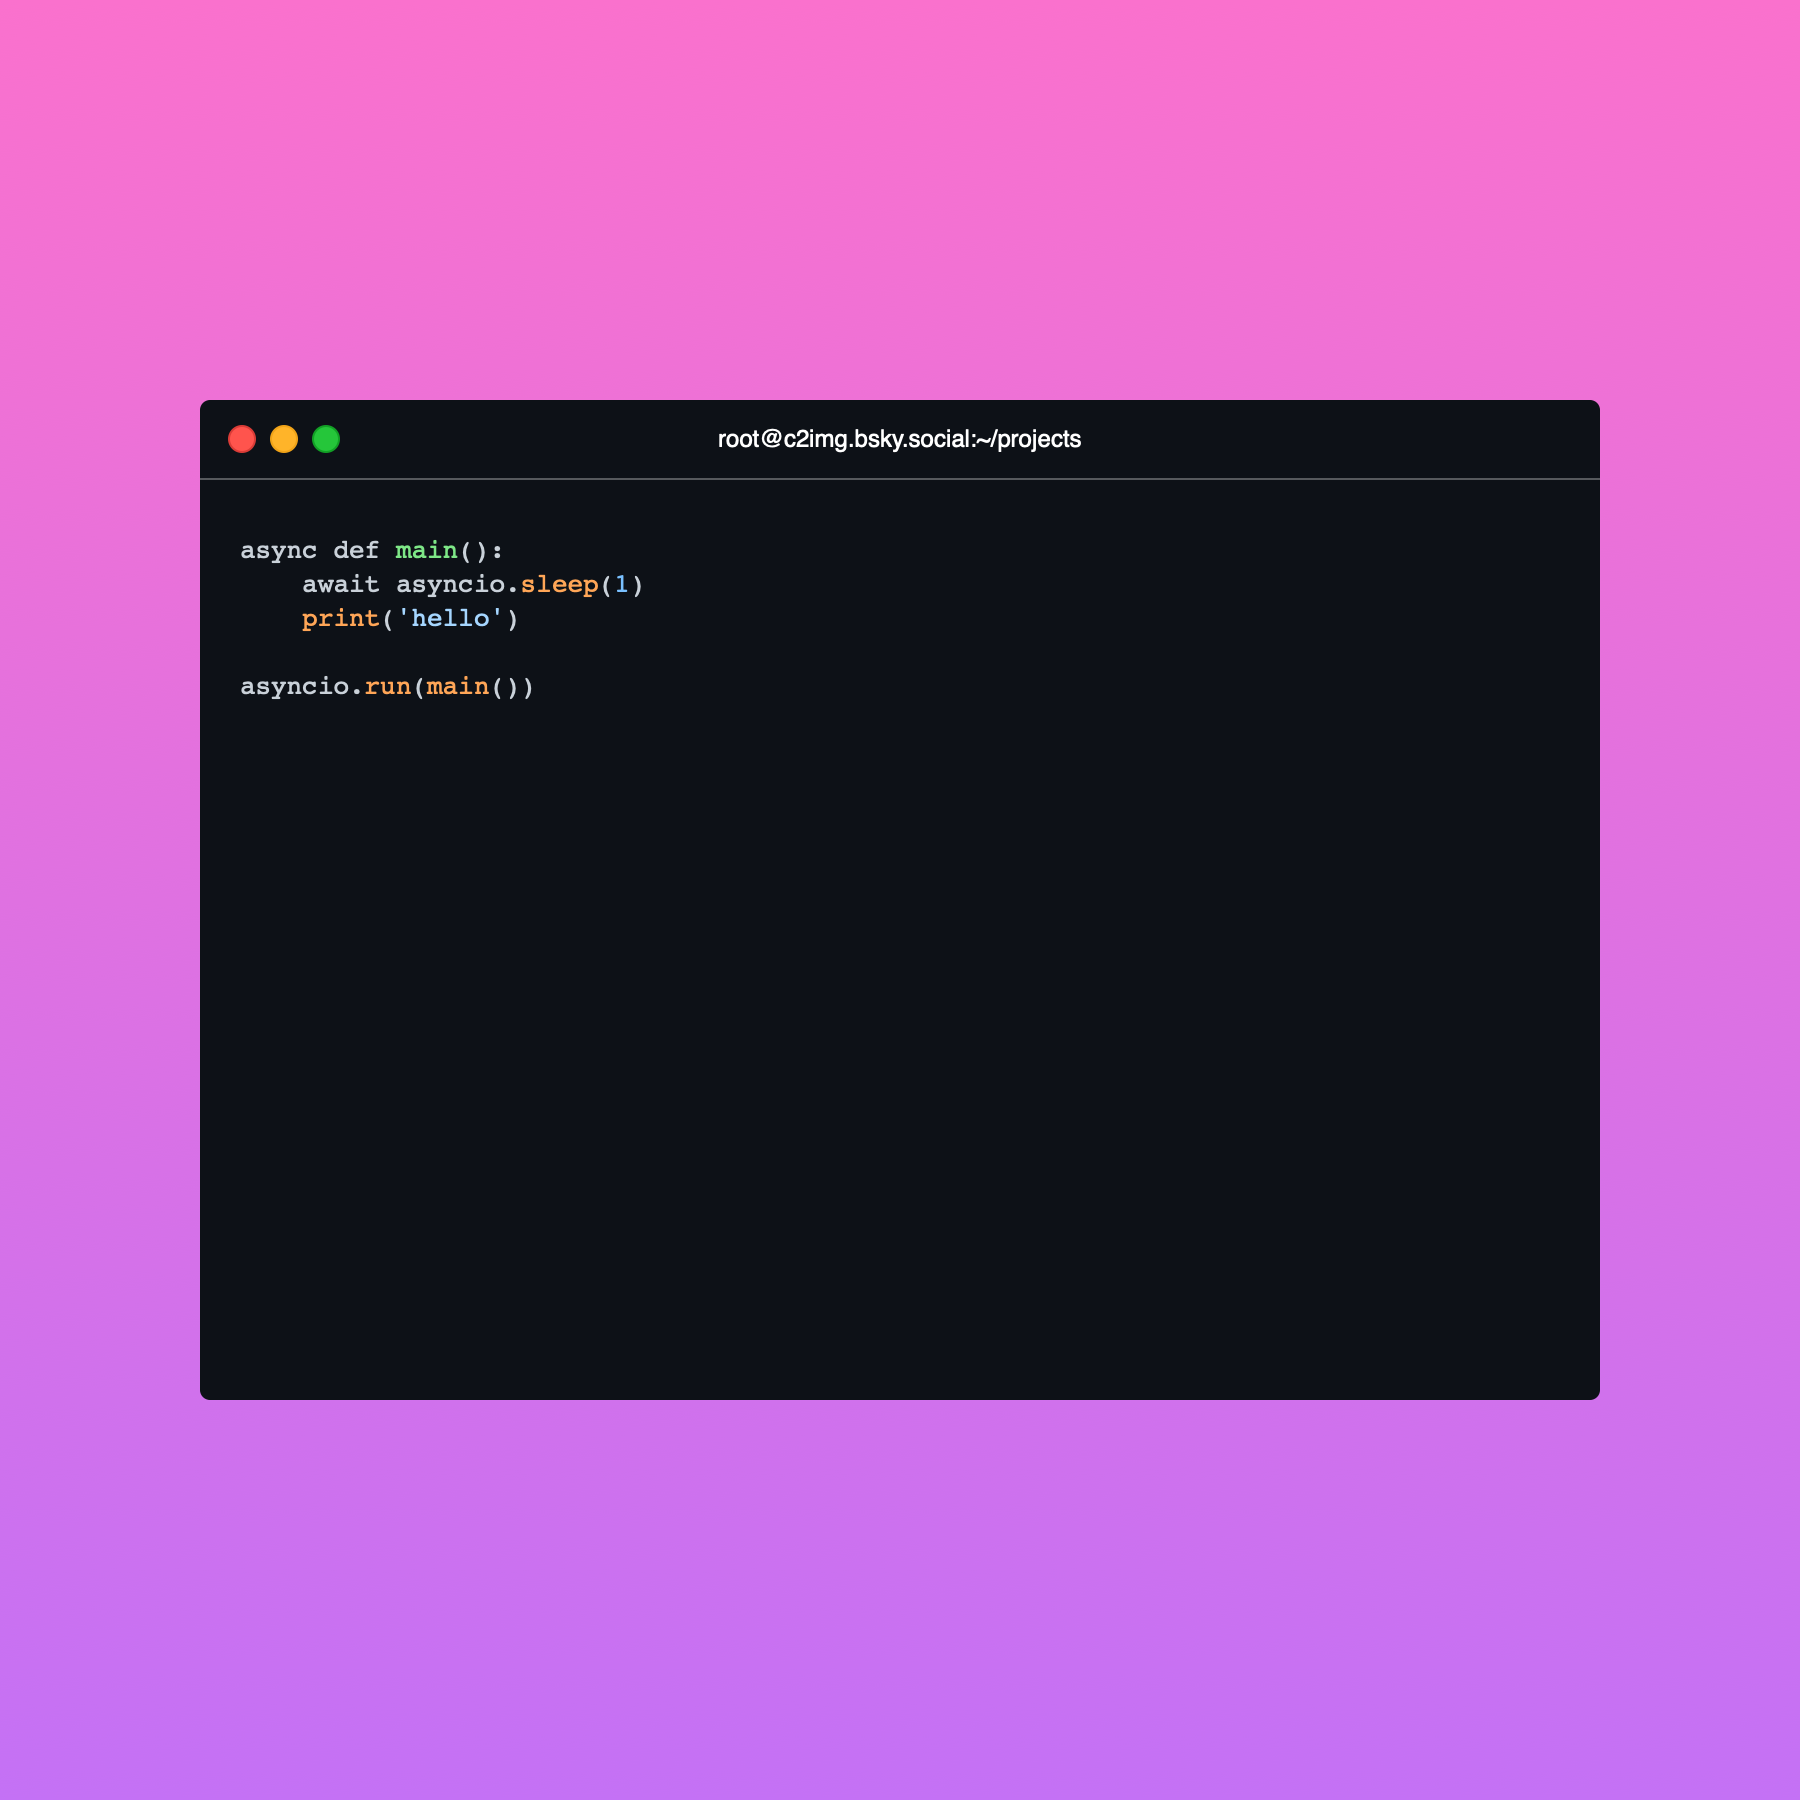

In [ ]:
await demo("""async def main():
    await asyncio.sleep(1)
    print('hello')

asyncio.run(main())""")

# A small React component

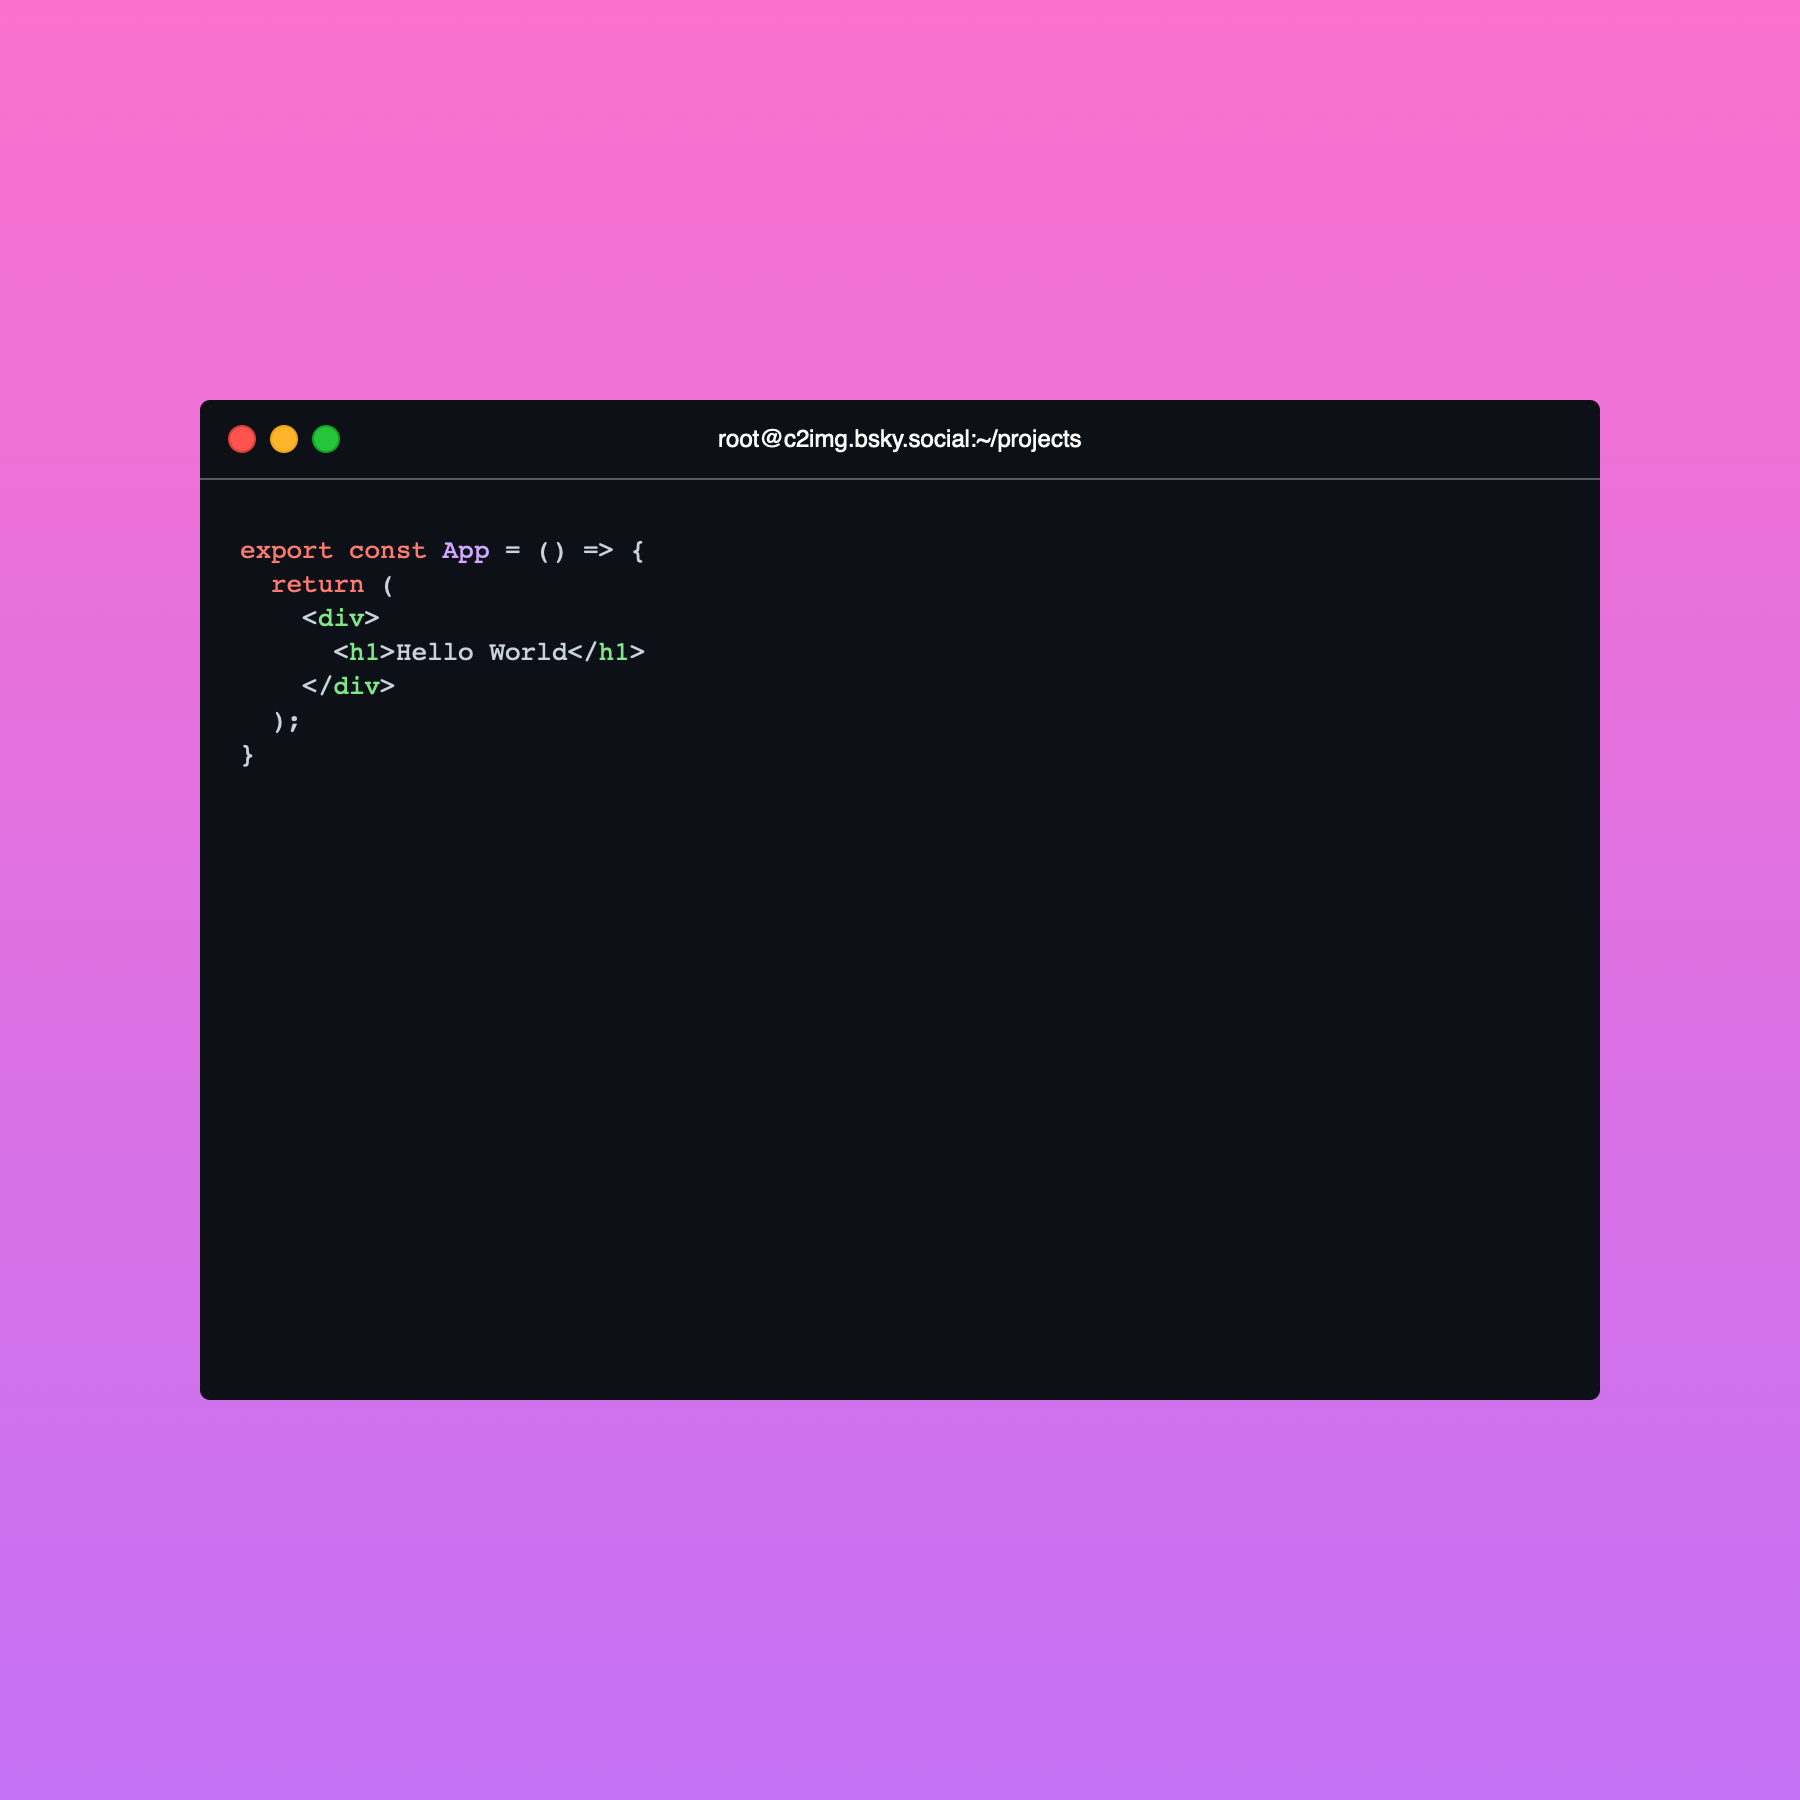

In [ ]:
await demo("""
export const App = () => {
  return (
    <div>
      <h1>Hello World</h1>
    </div>
  );
}
""")

# A bunch of tailwind stuff

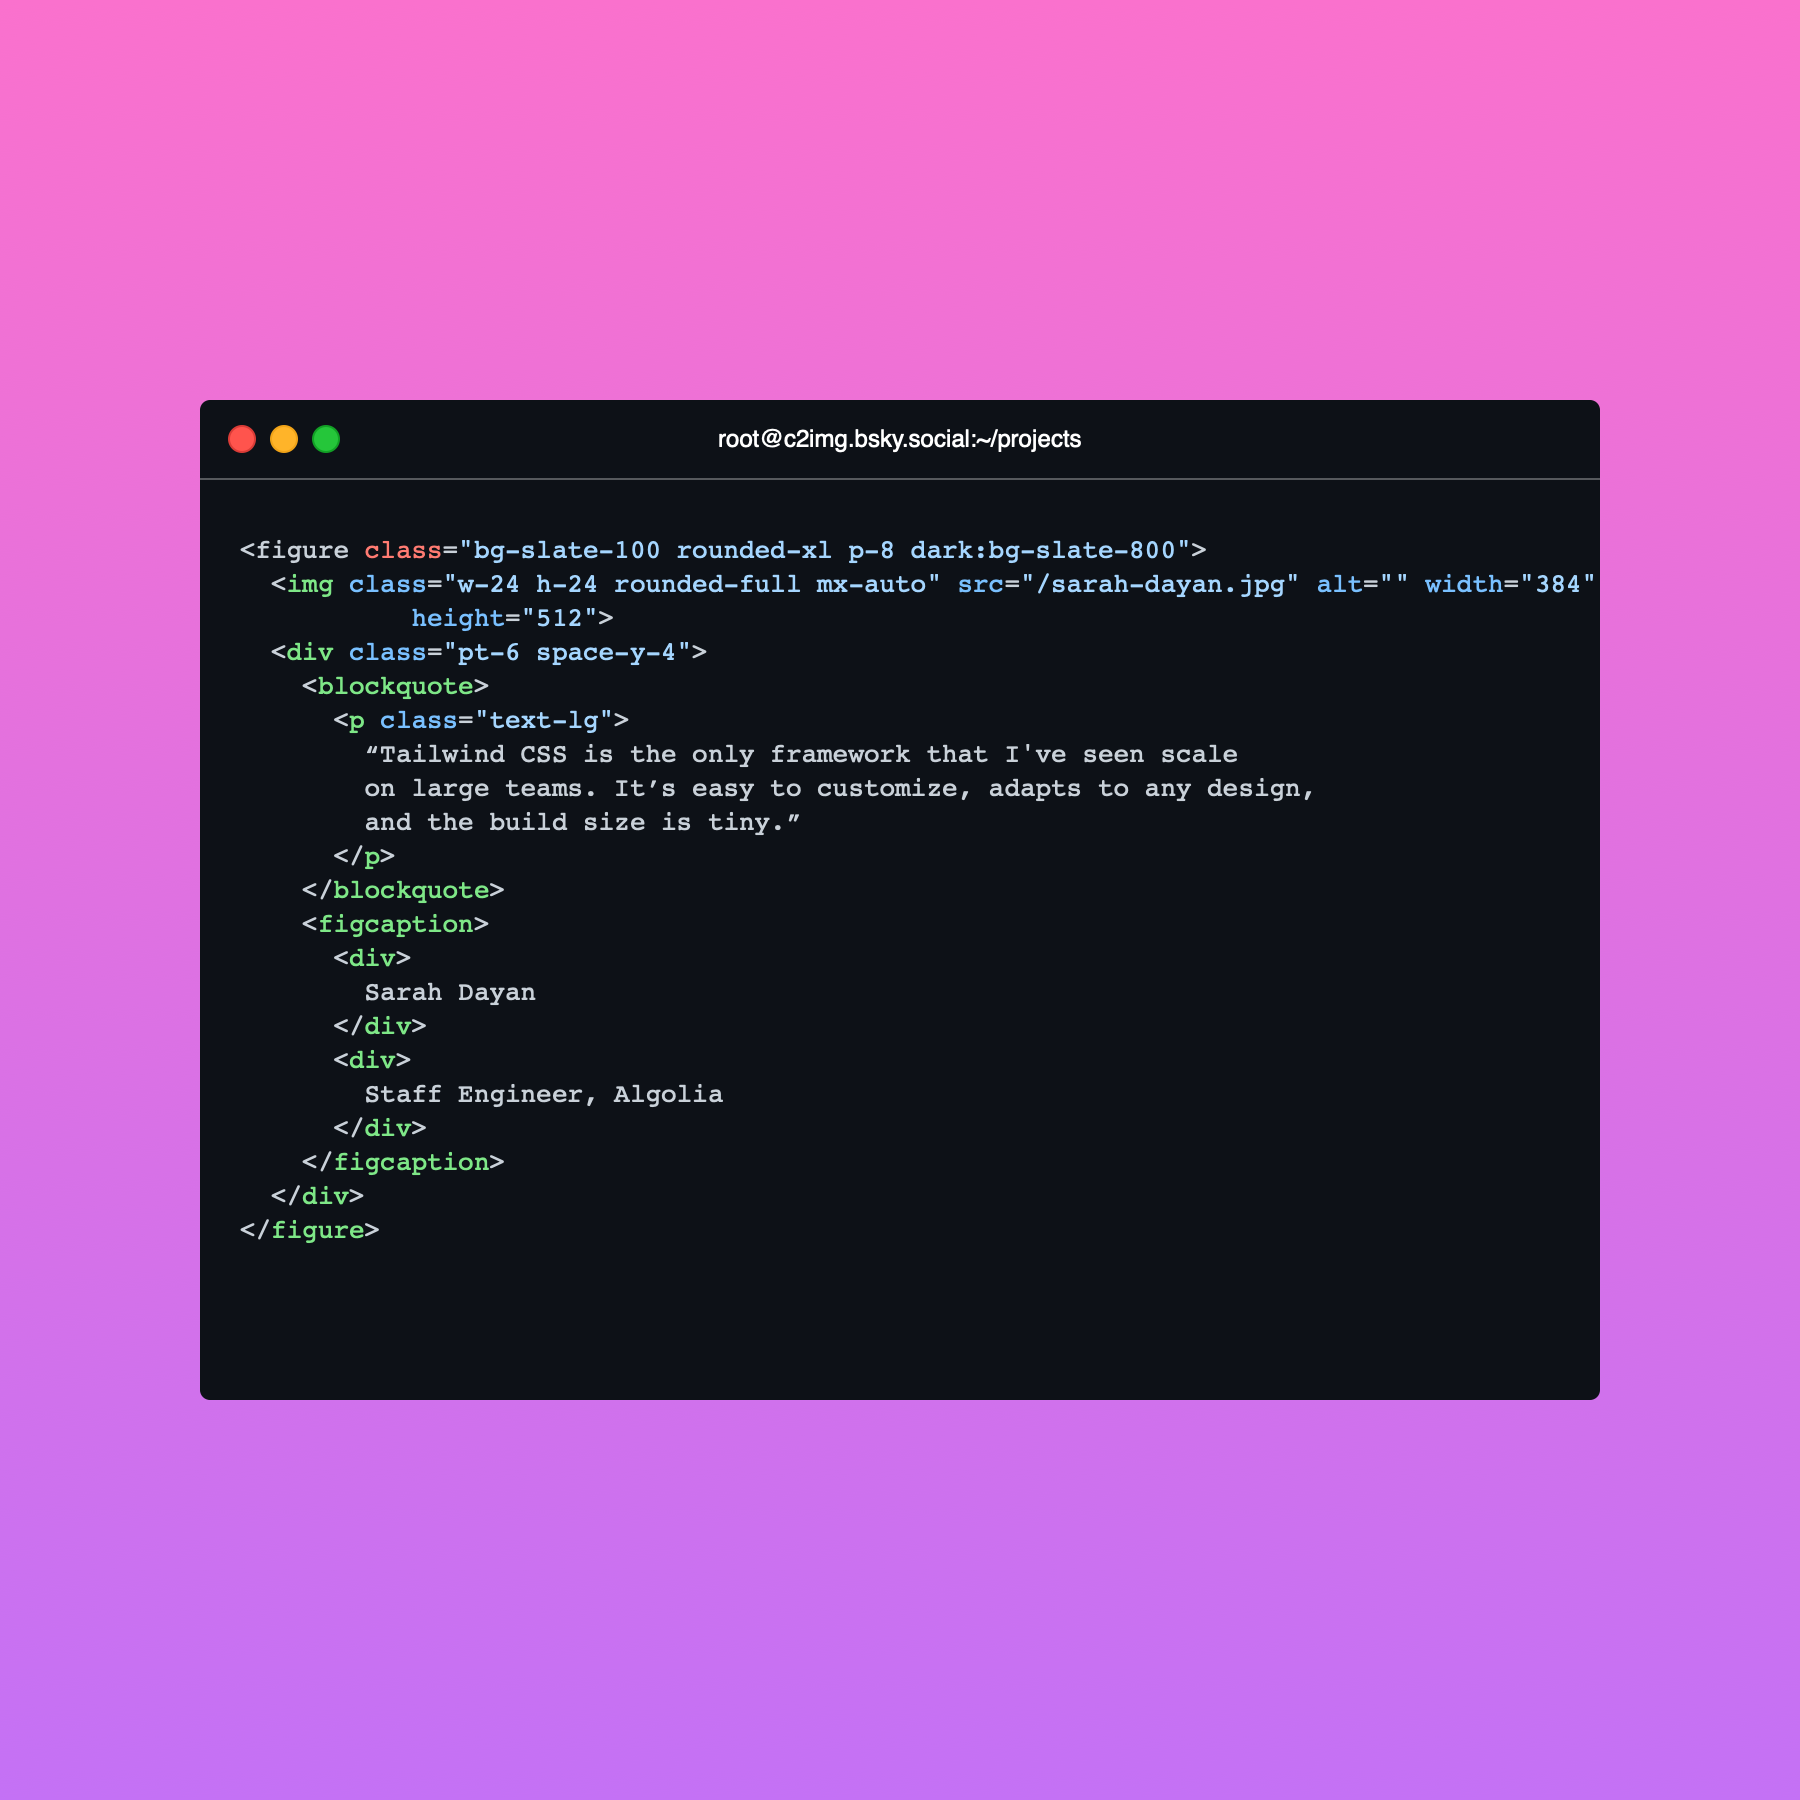

In [ ]:
await demo("""<figure class="bg-slate-100 rounded-xl p-8 dark:bg-slate-800">
  <img class="w-24 h-24 rounded-full mx-auto" src="/sarah-dayan.jpg" alt="" width="384"
           height="512">
  <div class="pt-6 space-y-4">
    <blockquote>
      <p class="text-lg">
        “Tailwind CSS is the only framework that I've seen scale
        on large teams. It’s easy to customize, adapts to any design,
        and the build size is tiny.”
      </p>
    </blockquote>
    <figcaption>
      <div>
        Sarah Dayan
      </div>
      <div>
        Staff Engineer, Algolia
      </div>
    </figcaption>
  </div>
</figure>""")

# A little bit of Rust

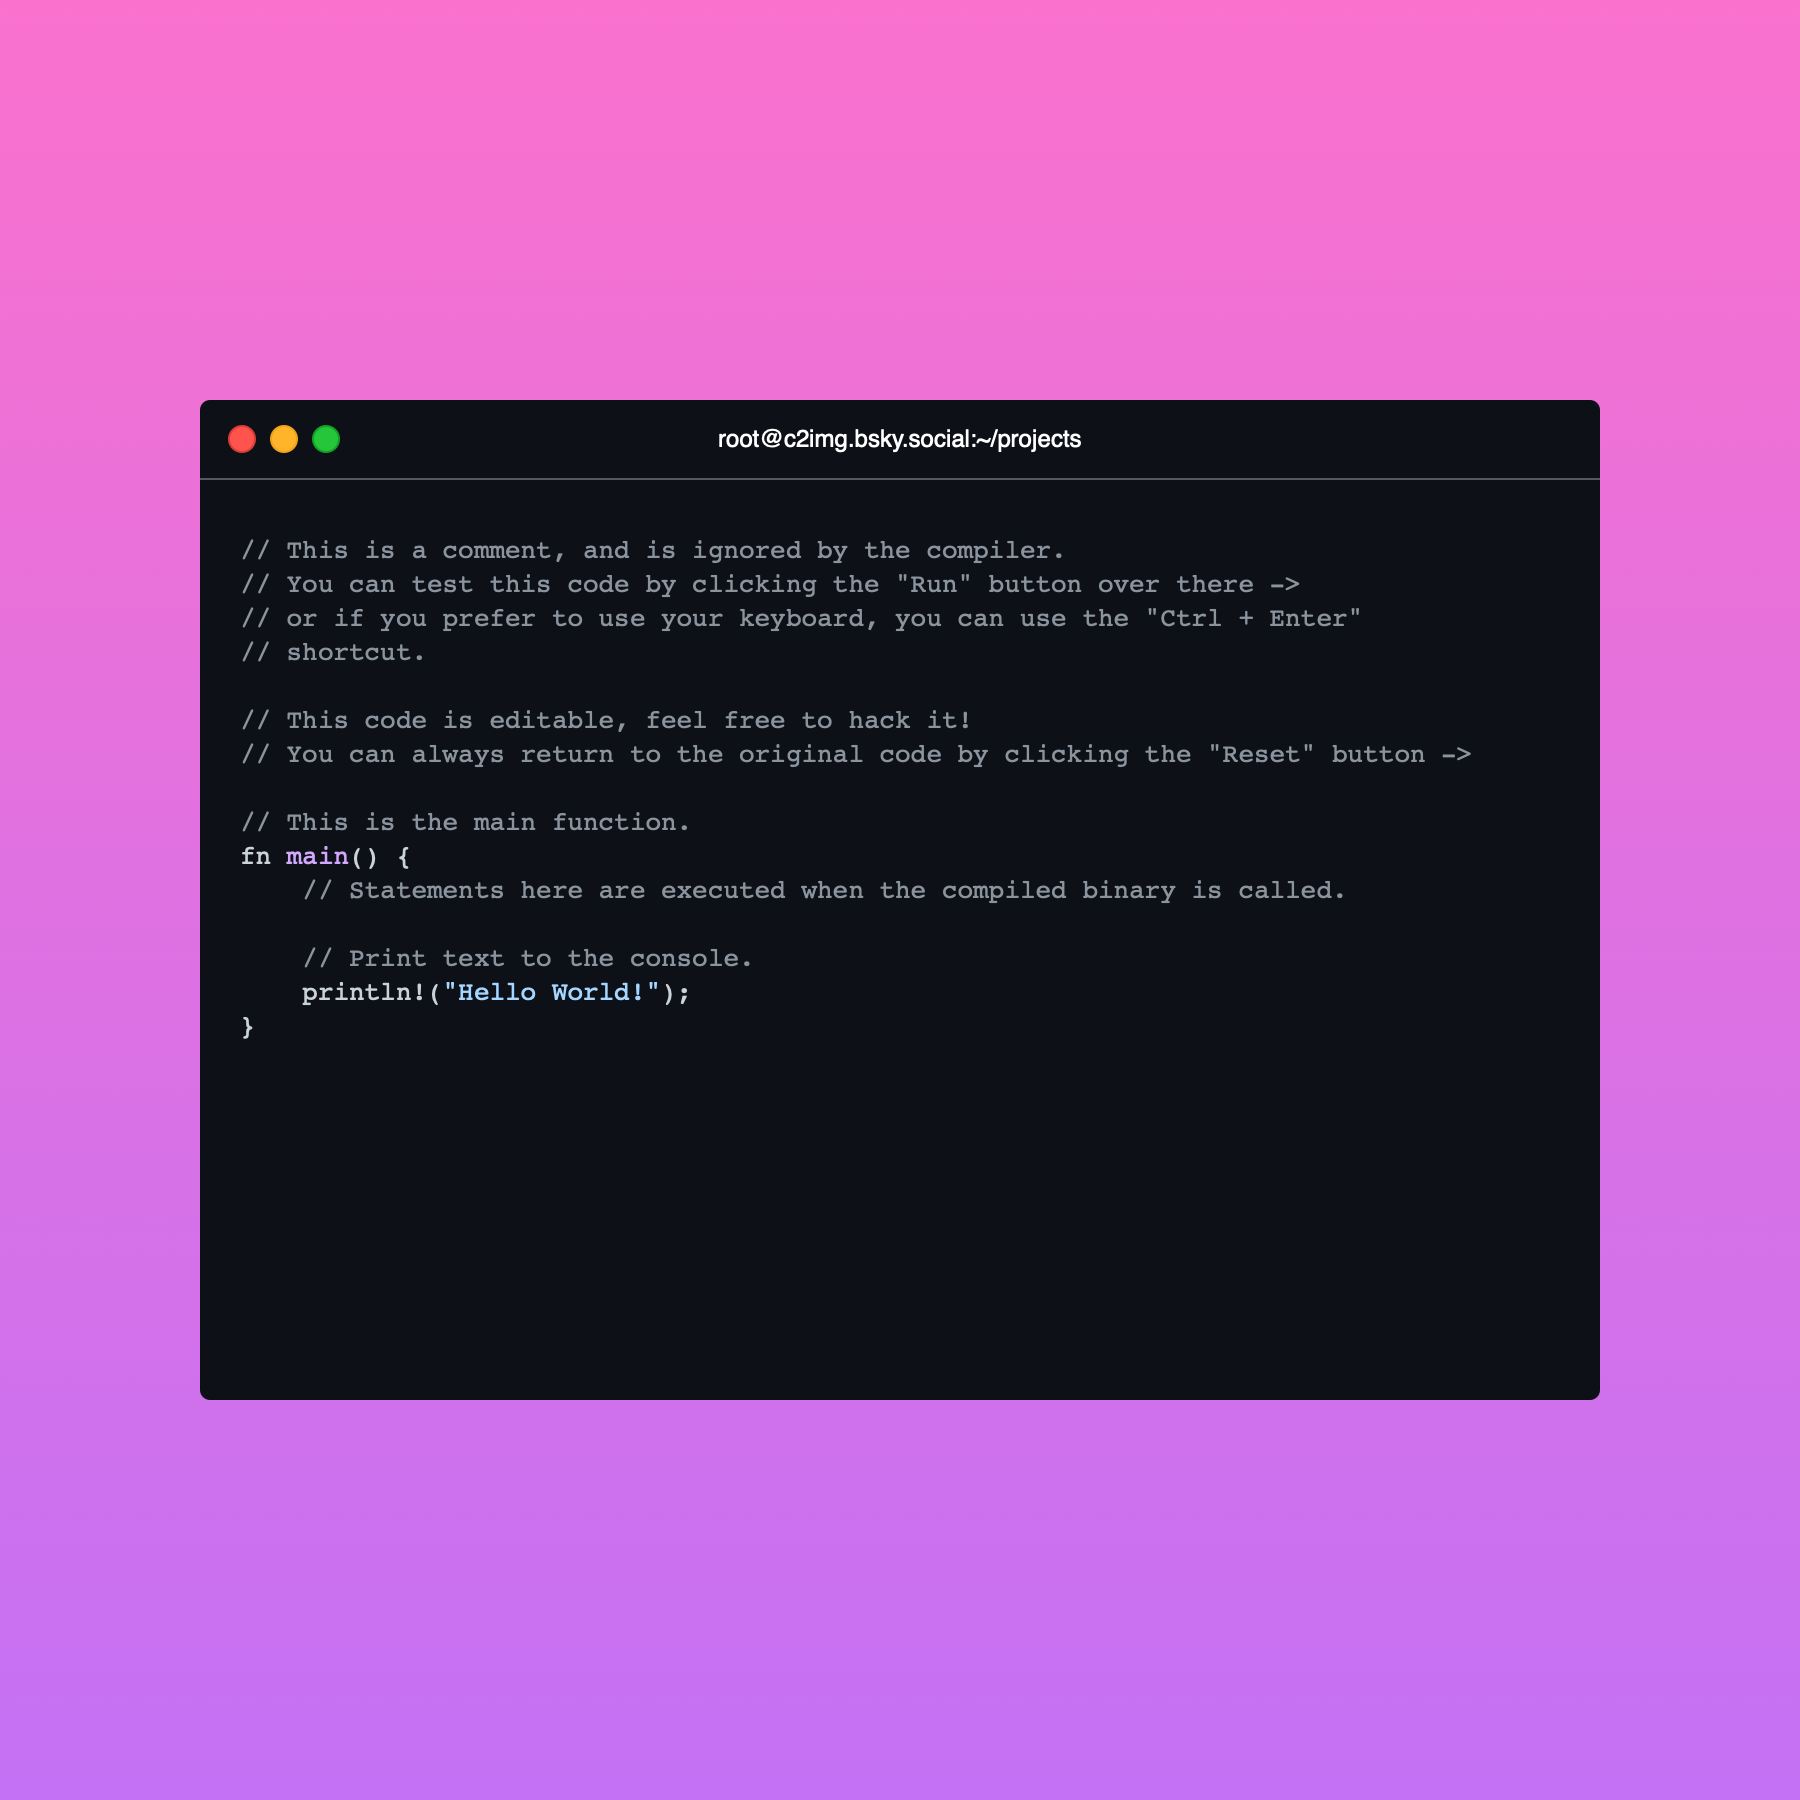

In [ ]:
await demo("""// This is a comment, and is ignored by the compiler.
// You can test this code by clicking the "Run" button over there ->
// or if you prefer to use your keyboard, you can use the "Ctrl + Enter"
// shortcut.

// This code is editable, feel free to hack it!
// You can always return to the original code by clicking the "Reset" button ->

// This is the main function.
fn main() {
    // Statements here are executed when the compiled binary is called.

    // Print text to the console.
    println!("Hello World!");
}""")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()